<a href="https://colab.research.google.com/github/ashleyliang08/Personal-Projects-links-to-my-resume/blob/main/(%E6%A8%A1%E6%8B%9F)%E7%95%AA%E8%8C%84%E5%B0%8F%E8%AF%B4%E7%94%A8%E6%88%B7%E9%98%85%E8%AF%BB%E5%93%81%E7%B1%BB%E5%81%8F%E5%A5%BD%E5%8F%8A%E7%95%99%E5%AD%98%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**番茄小说用户阅读品类偏好分布**

##**Import libraries**

In [93]:
!pip install pandas faker numpy
!pip install matplotlib
!pip install seaborn
import pandas as pd
from faker import Faker
import random
import numpy as np
from datetime import datetime, timedelta,date
import matplotlib.pyplot as plt
import seaborn as sns

##**Generate data**

In [207]:

fake = Faker()  # 生成Faker Generator
np.random.seed(42)  # 设置全局固定随机种子，确保数据可复现
user_count = 10000  # 模拟10000个用户

# 定义番茄小说核心业务参数
READ_CATEGORIES = ["Romance", "Fantasy", "Mystery", "Fiction"]  # 主流阅读品类
AGE_GROUPS = ["18-24 years old", "25-30 years old", "31-40 years old", "41 years old or more"]  # 用户年龄分布
GENDERS = ["male", "female"]
REGISTER_START_DATE = date(2023, 1, 1)


# 2. 生成用户的模拟数据
def generate_tomato_user_data():
    user_data = []
    for _ in range(user_count):
        # （1）用户基础信息
        user_id = f"Tomato_User_{fake.uuid4()[:8]}"  # 番茄用户ID格式
        gender = random.choice(GENDERS)  # 随机选择性别
        # 按权重选择年龄组（年轻用户占比更高）
        age_group = random.choices(AGE_GROUPS, weights=[0.4, 0.3, 0.2, 0.1], k=1)[0]

        # 随机生成注册时间及注册天数
        register_date = fake.date_between_dates(date_start=REGISTER_START_DATE, date_end=date.today())
        register_days = (date.today() - register_date).days

        # （2）阅读行为信息（按性别+年龄组设置差异化品类偏好）
        if gender == "female":  # 女性用户的品类偏好
            if age_group in ["18-24 years old", "25-30 years old"]:
                # 年轻女性更偏好 romance（言情）、fantasy（玄幻）
                read_category = random.choices(READ_CATEGORIES, weights=[0.4, 0.3, 0.15, 0.15])[0]
            else:
                # 年长女性更偏好 romance（言情）、fiction（都市）
                read_category = random.choices(READ_CATEGORIES, weights=[0.45, 0.1, 0.1, 0.35])[0]
        else:  # 男性用户的品类偏好
            if age_group in ["18-24 years old", "25-30 years old"]:
                # 年轻男性更偏好 fantasy（玄幻）、mystery（悬疑）
                read_category = random.choices(READ_CATEGORIES, weights=[0.1, 0.4, 0.3, 0.2])[0]
            else:
                # 年长男性更偏好 fiction（都市）、fantasy（玄幻）
                read_category = random.choices(READ_CATEGORIES, weights=[0.1, 0.3, 0.2, 0.4])[0]

        # 补充阅读行为的其他参数（之前遗漏的变量定义）
        read_duration = round(random.uniform(3, 60), 1)  # 单章阅读时长：3-60分钟
        chapter_completion = round(random.uniform(0.4, 1.0), 2)  # 章节完成率：40%-100%
        revisit_days = random.randint(1, 30)  # 1个月内的连续复访天数：1-30天

        # （3）听书行为信息
        is_listen = 1 if random.random() < 0.3 else 0
        if is_listen == 1:
            listen_ratio = round(random.uniform(0.2, 0.8), 2)  # 听书用户：听书占比20%-80%
        else:
            listen_ratio = 0.0  # 非听书用户：占比0

        # （4）互动与留存信息
        like_count = random.randint(0, 50) if revisit_days >= 7 else random.randint(0, 10)
        collect_count = random.randint(1, 20) if revisit_days >= 7 else random.randint(0, 5)
        is_retained_user = 1 if revisit_days >= 7 else 0  # 复访>=7天：判定为留存用户

        # 组装单条用户数据
        user_data.append([
            user_id, gender, age_group, register_date, register_days,
            read_category, read_duration, chapter_completion, revisit_days,
            is_listen, listen_ratio, like_count, collect_count, is_retained_user
        ])
    return user_data


# 3. 转换为DataFrame并保存
user_data_list = generate_tomato_user_data()
tomato_df = pd.DataFrame(
    user_data_list,
    columns=[
        "user_id", "gender", "age_group", "register_date", "register_days",
        "read_category", "read_duration", "chapter_completion", "revisit_days",
        "is_listen", "listen_ratio", "like_count", "collect_count", "is_retained_user"
    ]
)

# 保存为CSV文件
tomato_df.to_csv("番茄小说模拟用户行为数据.csv", index=False, encoding="utf-8-sig")
print(f"数据生成完成！共生成{user_count}条用户数据，已保存为CSV文件。")
print("\n数据预览（前20行）：")
tomato_df.head(20)


数据生成完成！共生成10000条用户数据，已保存为CSV文件。

数据预览（前20行）：


,user_id,gender,age_group,register_date,register_days,read_category,read_duration,chapter_completion,revisit_days,is_listen,listen_ratio,like_count,collect_count,is_retained_user
0,Tomato_User_72ab1279,female,18-24 years old,2025-07-04,89,Mystery,9.1,0.64,22,0,0.00,45,1,1
1,Tomato_User_44abb99c,female,31-40 years old,2023-08-26,767,Romance,52.6,0.81,3,0,0.00,4,2,0
2,Tomato_User_3a55b22f,female,18-24 years old,2023-07-29,795,Romance,6.2,0.50,25,0,0.00,30,11,1
3,Tomato_User_59455db8,female,25-30 years old,2024-06-23,465,Romance,45.0,0.49,14,0,0.00,29,1,1
4,Tomato_User_77a9f86e,female,25-30 years old,2024-08-31,396,Fiction,21.8,0.53,5,1,0.56,9,5,0
5,Tomato_User_71031875,female,31-40 years old,2023-09-22,740,Romance,50.1,0.55,1,1,0.38,0,5,0
6,Tomato_User_6da7ece2,female,25-30 years old,2023-07-11,813,Romance,20.1,0.89,6,1,0.53,8,2,0
7,Tomato_User_fce3bfbf,male,25-30 years old,2025-06-22,101,Mystery,35.6,0.62,16,1,0.38,24,6,1
8,Tomato_User_add55dac,female,31-40 years old,2023-07-29,795,Mystery,42.9,0.87,29,0,0.00,23,17,1
9,Tomato_User_820e80eb,female,31-40 years old,2024-11-13,322,Fiction,10.8,0.65,6,0,0.00,0,4,0


##**Expolratory data analysis**

In [209]:
#check rows and columns
tomato_df.shape

(10000, 14)

In [210]:
tomato_df.describe()

,register_days,read_duration,chapter_completion,revisit_days,is_listen,listen_ratio,like_count,collect_count,is_retained_user
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,506.241100,31.361360,0.699055,15.484500,0.304600,0.152875,20.914700,8.971700,0.79980
std,289.580148,16.627912,0.175533,8.636551,0.460261,0.250200,15.477674,6.139191,0.40017
min,1.000000,3.000000,0.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,254.750000,16.800000,0.550000,8.000000,0.000000,0.000000,7.000000,3.000000,1.00000
50%,510.000000,31.200000,0.700000,16.000000,0.000000,0.000000,19.000000,8.000000,1.00000
75%,758.000000,46.000000,0.850000,23.000000,1.000000,0.310000,34.000000,14.000000,1.00000
max,1004.000000,60.000000,1.000000,30.000000,1.000000,0.800000,50.000000,20.000000,1.00000


###**Distribution of genders across different ages**


In [211]:
# I want to see the distribution of genders across different ages
df_gender = pd.DataFrame(tomato_df.groupby(['gender', 'age_group']).size().rename('count'))
df_gender

count
gender age_group                  
female 18-24 years old        2055
       25-30 years old        1508
       31-40 years old        1018
       41 years old or more    478
male   18-24 years old        1997
       25-30 years old        1526
       31-40 years old         916
       41 years old or more    502

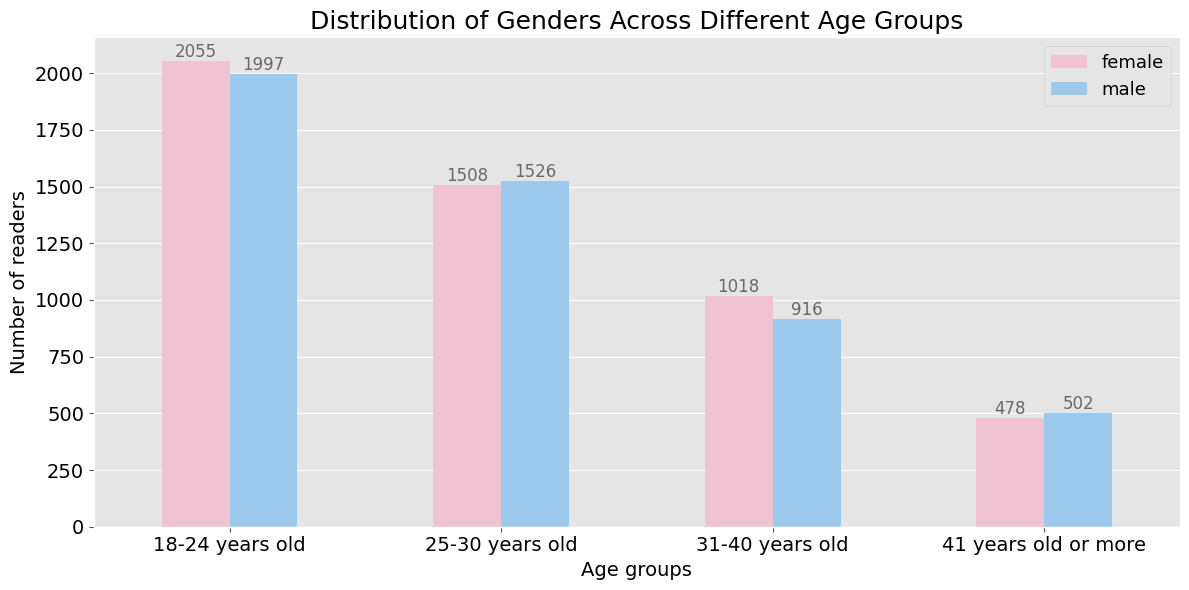

In [212]:
# Visualize the distribution of genders across different ages
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize = (12,6))
color_list = ['#F8BBD0','#90CAF9']
sns.barplot(
    data=df_gender,
    x='age_group',
    y= 'count',
    hue='gender',palette= color_list,width = 0.5
)
plt.title('Distribution of Genders Across Different Age Groups',fontsize = 18)
plt.xlabel('Age groups',color = 'k',fontsize = 14)
plt.xticks(rotation = 0,color = 'k',fontsize = 14)
plt.ylabel('Number of readers',color = 'k',fontsize = 14)
plt.yticks(color = 'k',fontsize = 14)
plt.legend(fontsize = 13)
# Add counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, color='dimgrey',fontsize = 12)
plt.tight_layout()

plt.show()

###**Distribution of preferences for reading genres across different ages and genders**

In [213]:
df_genres = pd.DataFrame(tomato_df.groupby(['gender', 'age_group','read_category']).size().rename('count')).reset_index()
df_genres.head()

,gender,age_group,read_category,count
0,female,18-24 years old,Fantasy,621
1,female,18-24 years old,Fiction,293
2,female,18-24 years old,Mystery,314
3,female,18-24 years old,Romance,827
4,female,25-30 years old,Fantasy,438


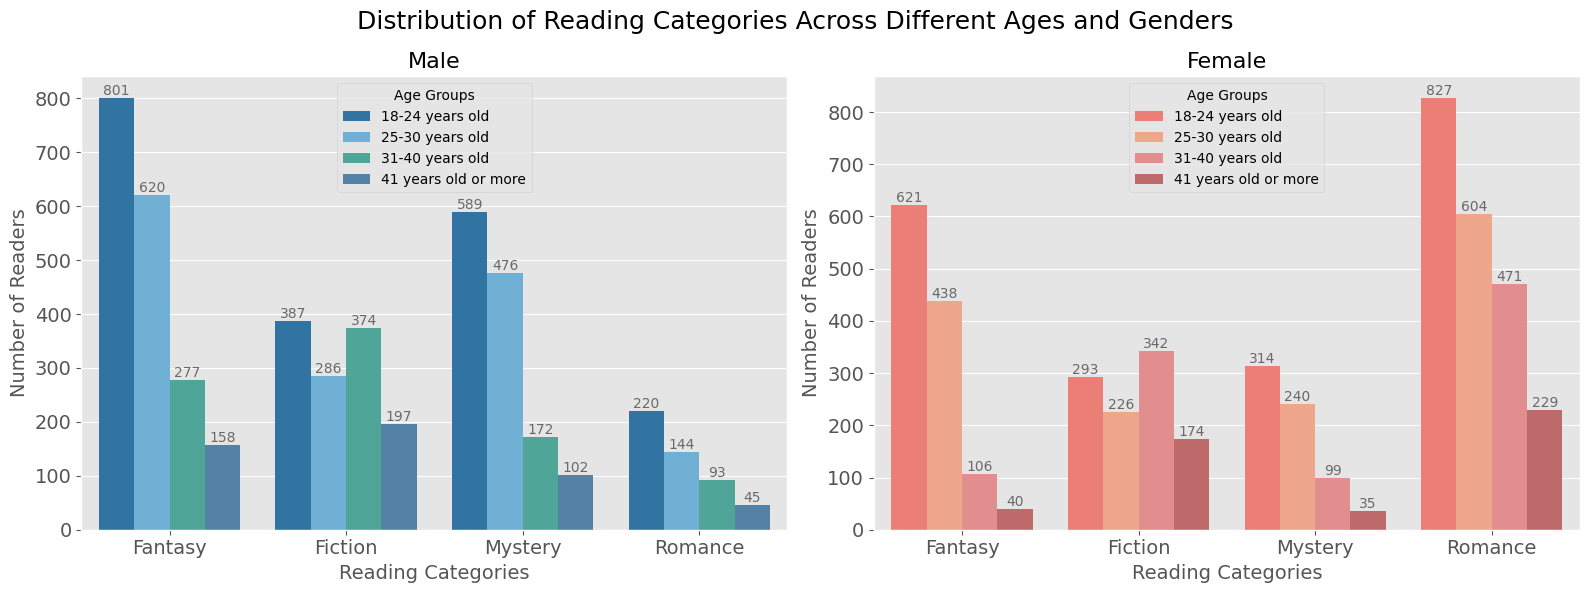

In [214]:
#fetch data
df_genres = tomato_df.groupby(['gender', 'age_group', 'read_category']).size().rename('count').reset_index()

male_data = df_genres[df_genres['gender'] == 'male']  # 男性用户数据
female_data = df_genres[df_genres['gender'] == 'female']  # 女性用户数据

#plot
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # ax1是左图（男），ax2是右图（女）
plt.style.use('ggplot')
#左图：男性用户的年龄组+品类偏好

color_list1 = ["#1F77B4", "#5FB4E6", "#42B3A3", "steelblue"]
# ["#42A5F5", "#90CAF9", "#26A69A", "#1565C0"]
sns.barplot(
    data=male_data,
    x='read_category',  # x轴：阅读品类
    y='count',          # y轴：读者数量
    hue='age_group',    # 用颜色区分年龄组
    errorbar=None,      # 去掉误差线
    ax=ax1,palette= color_list1
)

for container in ax1.containers:
    ax1.bar_label(container, color='dimgrey')

ax1.set_title('Male', fontsize=16)
ax1.set_xlabel('Reading Categories', fontsize=14)
ax1.set_ylabel('Number of Readers', fontsize=14)
ax1.tick_params(axis='x', labelsize=14)  # x轴刻度（品类名称）
ax1.tick_params(axis='y', labelsize=14)  # y轴刻度（数值）
ax1.legend(title='Age Groups',loc = 'upper center')




#右图：女性用户的年龄组+品类偏好
color_list2 = ["#FF6F61", "#FFA07A", "#F08080", "#CD5C5C"]
sns.barplot(
    data=female_data,
    x='read_category',
    y='count',
    hue='age_group',
    errorbar=None,
    ax=ax2,palette=color_list2
)
for container in ax2.containers:
    ax2.bar_label(container, color='dimgrey')

ax2.set_title('Female', fontsize=16)
ax2.set_xlabel('Reading Categories', fontsize=14)
ax2.set_ylabel('Number of Readers', fontsize=14)
ax2.tick_params(axis='x', labelsize=14)  # x轴刻度（品类名称）
ax2.tick_params(axis='y', labelsize=14)  # y轴刻度（数值）
ax2.legend(title='Age Groups',loc = 'upper center')


fig1.suptitle('Distribution of Reading Categories Across Different Ages and Genders', fontsize=18)

plt.tight_layout()

plt.show()

#**品类偏好与用户留存的关联**

**目标：明确 “哪个品类能提升留存”，为番茄优化推荐策略提供依据。**

In [215]:
tomato_df.head()

,user_id,gender,age_group,register_date,register_days,read_category,read_duration,chapter_completion,revisit_days,is_listen,listen_ratio,like_count,collect_count,is_retained_user
0,Tomato_User_72ab1279,female,18-24 years old,2025-07-04,89,Mystery,9.1,0.64,22,0,0.00,45,1,1
1,Tomato_User_44abb99c,female,31-40 years old,2023-08-26,767,Romance,52.6,0.81,3,0,0.00,4,2,0
2,Tomato_User_3a55b22f,female,18-24 years old,2023-07-29,795,Romance,6.2,0.50,25,0,0.00,30,11,1
3,Tomato_User_59455db8,female,25-30 years old,2024-06-23,465,Romance,45.0,0.49,14,0,0.00,29,1,1
4,Tomato_User_77a9f86e,female,25-30 years old,2024-08-31,396,Fiction,21.8,0.53,5,1,0.56,9,5,0


In [272]:
# 1. 统计各品类的核心留存指标
retention_by_category = tomato_df.groupby(['read_category']).agg({
    'user_id': 'count',  # 该品类用户数
    'is_retained_user': 'sum',  # 该品类留存用户数
    'revisit_days': 'mean'  # 该品类用户平均复访天数
}).round(2)
# 计算留存率（留存用户数/总用户数）
retention_by_category['retention_rate'] = (retention_by_category['is_retained_user'] / retention_by_category['user_id'] * 100).round(2)
# 重命名列，便于理解
retention_by_category.reset_index(inplace=True)
retention_by_category.columns = ['Read_Categories','Total_Num_users', 'Retained_Users', 'Average_Revisit_Days', 'Retention_Rate(%)']
retention_by_category.set_index(['Read_Categories'],inplace=True)
print("- - - - - - - - - - - - -  - - - - - 各品类用户留存指标- - - - - - - - - - - - - - - - - - - - ")
retention_by_category


- - - - - - - - - - - - -  - - - - - 各品类用户留存指标- - - - - - - - - - - - - - - - - - - - 


,Total_Num_users,Retained_Users,Average_Revisit_Days,Retention_Rate(%)
Read_Categories,,,,
Fantasy,3061,2466,15.48,80.56
Fiction,2279,1798,15.25,78.89
Mystery,2027,1646,15.73,81.20
Romance,2633,2088,15.50,79.30


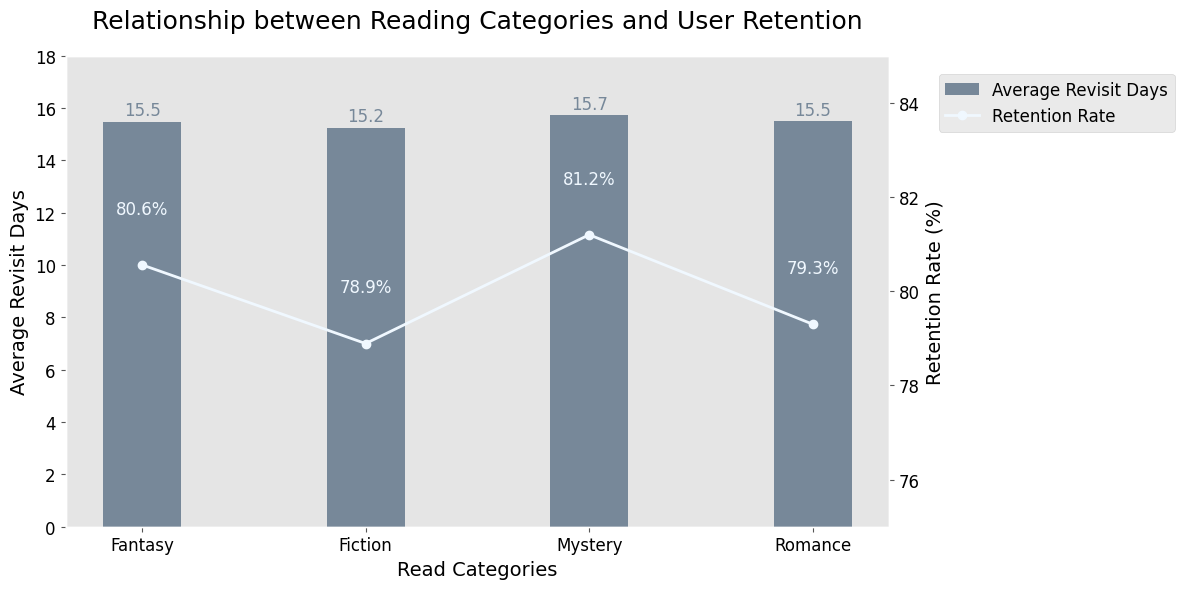

In [288]:
#可视化品类与留存的关联
fig2, ax1 = plt.subplots(figsize=(12, 6))
plt.style.use('ggplot')
# 左Y轴：平均复访天数（柱状图）
x = range(len(retention_by_category.index))
width = 0.35
bars = ax1.bar(
    x,
    retention_by_category['Average_Revisit_Days'],
    width,
    color='lightslategrey',
    label='Average Revisit Days'
)
ax1.set_xlabel('Read Categories', fontsize=14,color = 'k')
ax1.set_ylabel('Average Revisit Days', fontsize=14, color='k')  # 轴标签与柱状图同色
ax1.set_ylim(0, 18)  # 设置Y轴范围
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.tick_params(axis='x', labelcolor='k', labelsize=12)
ax1.grid(False)     # 关闭左坐标轴（柱状图）的网格线
 # 柱状图数值标签（与柱状图同色）
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.1,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        color='lightslategrey',
        fontsize=12
    )




# 右Y轴：留存率（折线图）
ax2 = ax1.twinx()

line = ax2.plot(
    x,
    retention_by_category['Retention_Rate(%)'],
    color='aliceblue',
    marker='o',
    linewidth=2,
    label='Retention Rate'
)
ax2.set_ylabel('Retention Rate (%)', fontsize=14, color='k')  # 轴标签与折线图同色
ax2.tick_params(axis='y', labelcolor='k', labelsize=12)
ax2.set_ylim(75, 85)  # 设置Y轴范围
ax2.grid(False)     # 关闭右坐标轴（柱状图）的网格线
 # 折线图数值标签（与折线图同色）
for i, rate in enumerate(retention_by_category['Retention_Rate(%)']):
    ax2.text(
        i,
        rate + 1,
        f'{rate:.1f}%',
        ha='center',
        va='bottom',
        color='aliceblue',
        fontsize=12
    )

# 统一X轴标签
ax1.set_xticks(x)
ax1.set_xticklabels(retention_by_category.index, fontsize=12)
# 标题
plt.title(
    'Relationship between Reading Categories and User Retention',
    fontsize=18,
    pad=20
)

# 调整图例到图外右侧
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='center left',        # 图例相对锚点的位置
    bbox_to_anchor=(1.05, 0.9),# 锚点位置（右侧中间）
    fontsize=12
)

plt.tight_layout()
plt.show()


**1.留存率排名：悬疑（81.20%）> 玄幻（80.6%）> 言情（79.3%）> 都市（78.9%）。**

**2.复访天数：悬疑用户平均复访15.7天，显著高于其他品类，是提升留存的核心品类。**
